[View in Colaboratory](https://colab.research.google.com/github/parampopat/deeplearning_lab/blob/master/mnist_cnn_lab.ipynb)

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.2180 - acc: 0.9341 - val_loss: 0.0602 - val_acc: 0.9803
Epoch 2/10
 - 9s - loss: 0.0623 - acc: 0.9813 - val_loss: 0.0431 - val_acc: 0.9859
Epoch 3/10
 - 9s - loss: 0.0443 - acc: 0.9862 - val_loss: 0.0331 - val_acc: 0.9894
Epoch 4/10
 - 9s - loss: 0.0332 - acc: 0.9894 - val_loss: 0.0261 - val_acc: 0.9917
Epoch 5/10
 - 9s - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0266 - val_acc: 0.9914
Epoch 6/10
 - 9s - loss: 0.0227 - acc: 0.9928 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 7/10
 - 9s - loss: 0.0185 - acc: 0.9944 - val_loss: 0.0265 - val_acc: 0.9910
Epoch 8/10
 - 9s - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0284 - val_acc: 0.9914
Epoch 9/10
 - 9s - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0297 - val_acc: 0.9895
Epoch 10/10
 - 9s - loss: 0.0114 - acc: 0.9963 - val_loss: 0.029

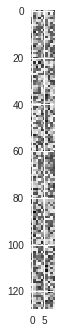

In [2]:
"""
__author__ = "Param Popat"
__version__ = "1"
__git__ = "https://github.com/parampopat/"
"""

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


def get_model(xtrain, ytrain, xtest, ytest, input_shape):
    """
    Trains and returns the model
    :return: Trained Model
    """
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='conv_1'))
    model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='dense_1'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax', name='out'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=2, validation_data=(xtest, ytest))
    return model


def train():
    """

    :return:
    """


img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = get_model(x_train, y_train, x_test, y_test, input_shape)
arr = model.get_weights()
# plt.plot(arr[0][0][0])
plt.imshow(arr[6])
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', accuracy[1])



In [5]:
layer_name = model.layers[1].name
print(layer_name)

conv_2


In [0]:
convolve_1=model.get_layer("conv_1")

In [14]:
arr = convolve_1.get_weights()
print(arr)

[array([[[[-1.03146970e-01,  3.29892971e-02, -4.82767858e-02,
           2.09408909e-01, -3.47042620e-01, -1.43813759e-01,
          -4.15535457e-02, -4.89087515e-02, -5.59743419e-02,
           1.59862712e-01,  2.37988576e-01, -9.56533402e-02,
           1.16387740e-01, -3.95809719e-03,  1.35628894e-01,
           2.03342825e-01,  1.86430261e-01,  2.71961410e-02,
          -1.84460223e-01,  2.08448872e-01,  1.87061772e-01,
           3.83480005e-02, -1.00514889e-01, -2.20933091e-02,
          -8.42340738e-02, -1.34658441e-01, -2.73737580e-01,
           3.01346809e-01,  2.55413773e-03,  5.52152917e-02,
          -1.35976419e-01,  1.56120405e-01]],

        [[ 2.14845389e-01,  3.64381000e-02, -8.33795741e-02,
           1.69022188e-01, -3.30361545e-01,  1.40612304e-01,
          -1.99892566e-01, -9.66394618e-02,  1.88321397e-01,
          -1.00457892e-01, -9.54804197e-02,  2.02879429e-01,
          -8.69385898e-02, -1.08287446e-01,  1.49052152e-02,
          -8.87620971e-02,  7.7321402

In [0]:
import numpy as np
arr = np.array(arr)

In [28]:
arr

array([array([[[[-1.03146970e-01,  3.29892971e-02, -4.82767858e-02,
           2.09408909e-01, -3.47042620e-01, -1.43813759e-01,
          -4.15535457e-02, -4.89087515e-02, -5.59743419e-02,
           1.59862712e-01,  2.37988576e-01, -9.56533402e-02,
           1.16387740e-01, -3.95809719e-03,  1.35628894e-01,
           2.03342825e-01,  1.86430261e-01,  2.71961410e-02,
          -1.84460223e-01,  2.08448872e-01,  1.87061772e-01,
           3.83480005e-02, -1.00514889e-01, -2.20933091e-02,
          -8.42340738e-02, -1.34658441e-01, -2.73737580e-01,
           3.01346809e-01,  2.55413773e-03,  5.52152917e-02,
          -1.35976419e-01,  1.56120405e-01]],

        [[ 2.14845389e-01,  3.64381000e-02, -8.33795741e-02,
           1.69022188e-01, -3.30361545e-01,  1.40612304e-01,
          -1.99892566e-01, -9.66394618e-02,  1.88321397e-01,
          -1.00457892e-01, -9.54804197e-02,  2.02879429e-01,
          -8.69385898e-02, -1.08287446e-01,  1.49052152e-02,
          -8.87620971e-02,  7.7

In [0]:
!pip install -U -q PyDrive

In [4]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from tensorflow.examples.tutorials.mnist import input_data
import numpy
from sklearn import metrics
from keras.models import Sequential 
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,Convolution2D

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1L5wT1_-rCtSsPBC_T-5ktiCvpWoHQ8If' in parents"}).GetList()

for f in file_list:
  print(f)
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

GoogleDriveFile({'kind': 'drive#file', 'id': '1z1fn5L_cN4_1RY2IcuFZVbzzGYdLs2Nb', 'etag': '"Kk_83xxobVILlgYUB8xd9E4tSOE/MTUzNDgyMzk0MDM3Nw"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1z1fn5L_cN4_1RY2IcuFZVbzzGYdLs2Nb', 'webContentLink': 'https://drive.google.com/uc?id=1z1fn5L_cN4_1RY2IcuFZVbzzGYdLs2Nb&export=download', 'alternateLink': 'https://drive.google.com/file/d/1z1fn5L_cN4_1RY2IcuFZVbzzGYdLs2Nb/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1z1fn5L_cN4_1RY2IcuFZVbzzGYdLs2Nb/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/x-gzip', 'title': 'train-images-idx3-ubyte.gz', 'mimeType': 'application/x-gzip', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2018-08-21T03:59:00.377Z', 'modifiedDate': '2018-08-21T03:59:00.377Z', 'modifiedByMeDate': '2018-08-21T03:59:00.377Z', 'lastViewedByMeDate'

In [5]:
fashion_mnist = input_data.read_data_sets("/content/data/", one_hot=True)
print(fashion_mnist)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

In [0]:
x_train = fashion_mnist.train.images
x_test = fashion_mnist.test.images
y_train = fashion_mnist.train.labels
y_test = fashion_mnist.test.labels

In [7]:
  import keras
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, 10)
  y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples


In [0]:
from google.colab import files
uploaded = files.upload()

Saving fashion_1.h5 to fashion_1 (1).h5


In [1]:
from keras.models import load_model
model = load_model('fashion_1 (1).h5')

Using TensorFlow backend.


OSError: ignored

ValueError: ignored

In [0]:
  from keras.models import load_model
  model = load_model('fashion_1 (1).h5')

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  print(model.summary())
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1, batch_size=128)